In [60]:
import pandas as pd

dados = pd.read_csv("swiss.csv")

print("Preview de dados")
print(dados.head())

print("\nSummary de Dados \n")
#dados.info()
print(dados.describe())

Preview de dados
       Location  Fertility  Agriculture  Examination  Education  Catholic  \
0    Courtelary       80.2         17.0           15         12      9.96   
1      Delemont       83.1         45.1            6          9     84.84   
2  Franches-Mnt       92.5         39.7            5          5     93.40   
3       Moutier       85.8         36.5           12          7     33.77   
4    Neuveville       76.9         43.5           17         15      5.16   

   Infant.Mortality  
0              22.2  
1              22.2  
2              20.2  
3              20.3  
4              20.6  

Summary de Dados 

       Fertility  Agriculture  Examination  Education   Catholic  \
count  47.000000    47.000000    47.000000  47.000000   47.00000   
mean   70.142553    50.659574    16.489362  10.978723   41.14383   
std    12.491697    22.711218     7.977883   9.615407   41.70485   
min    35.000000     1.200000     3.000000   1.000000    2.15000   
25%    64.700000    35.90000

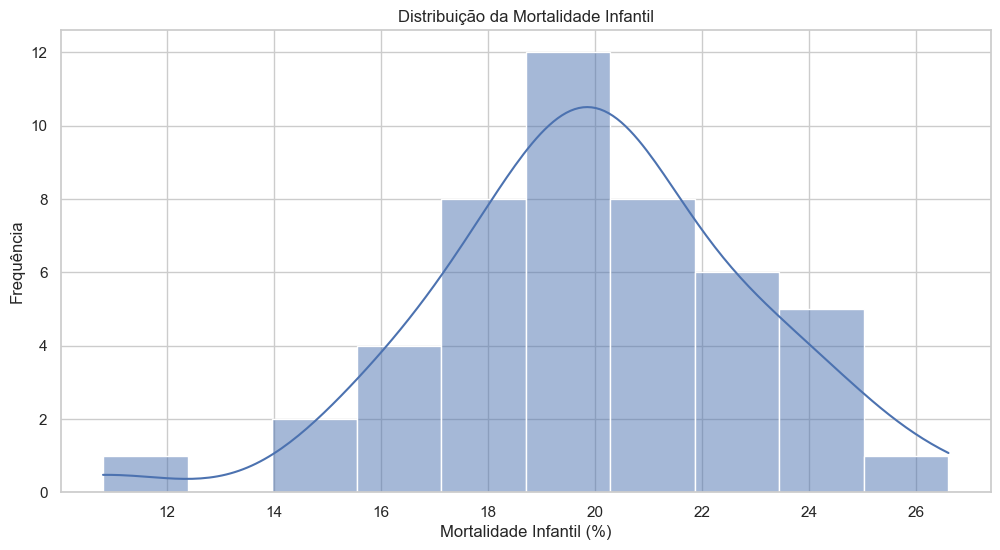

In [61]:
#Matriz de correlação podia fazer
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo do Seaborn
sns.set(style="whitegrid", color_codes=True)

# Criação do gráfico de distribuição para a variável Infant.Mortality
plt.figure(figsize=(12, 6))
sns.histplot(dados['Infant.Mortality'], bins=10, kde=True)
plt.title('Distribuição da Mortalidade Infantil')
plt.xlabel('Mortalidade Infantil (%)')
plt.ylabel('Frequência')
plt.show()
#Consideramos o outlier
#Podemos analisar sem o outlier


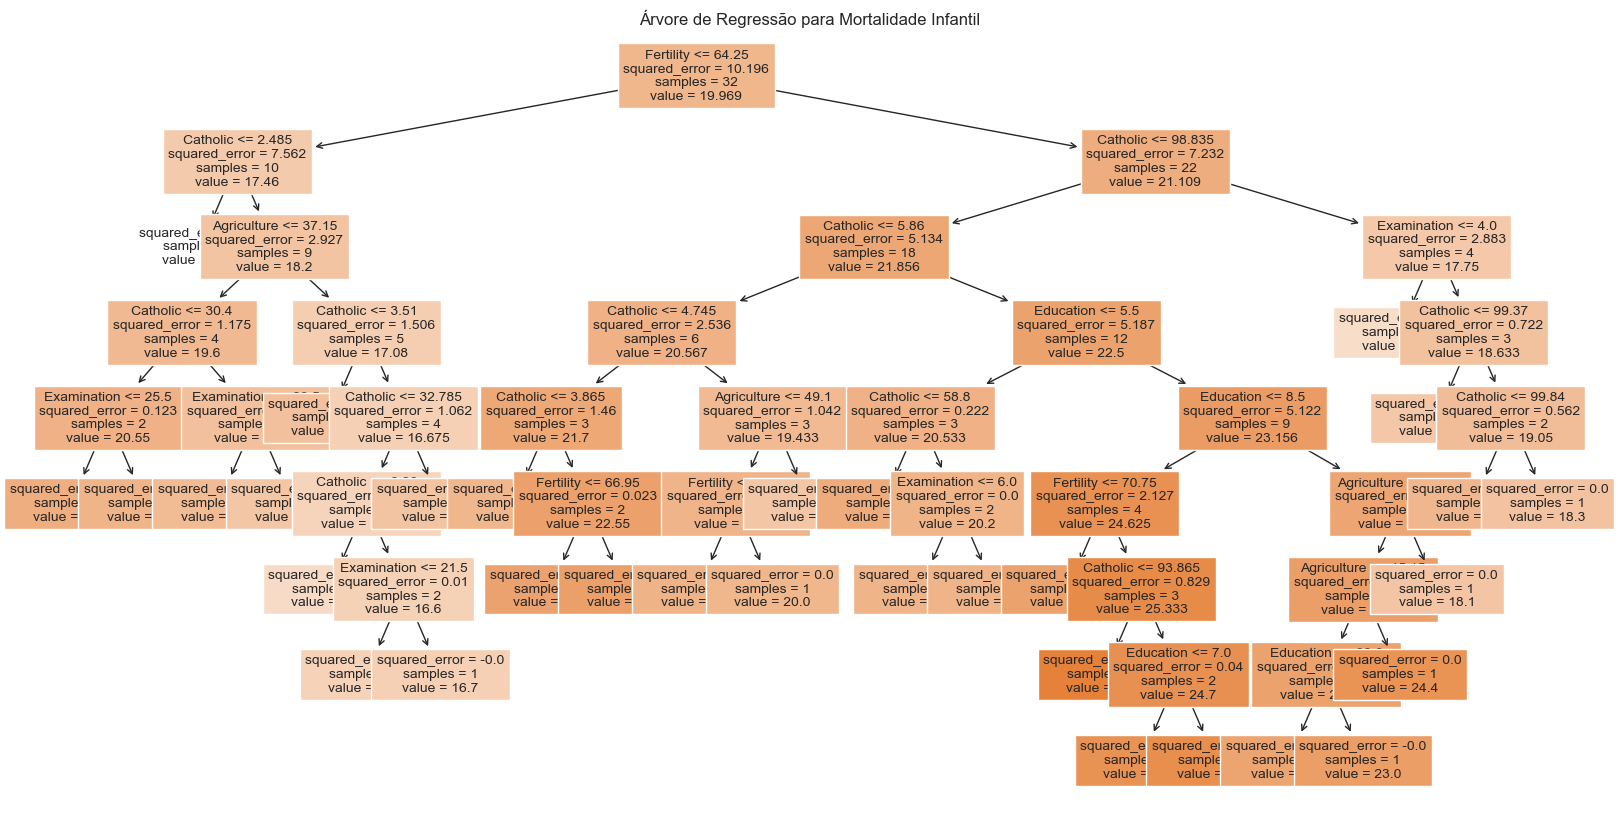

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import plot_tree

# Preparação dos dados
X = dados.drop(['Infant.Mortality', 'Location'], axis=1)
y = dados['Infant.Mortality']

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, test_size=0.3, random_state=42)

# Criação do modelo de árvore de regressão
regressor = DecisionTreeRegressor( random_state=42)
regressor.fit(X_train, y_train)

# Previsões
y_pred = regressor.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

feature_names_list = list(X.columns)

# Visualização da árvore de regressão
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=feature_names_list, filled=True, fontsize=10)
plt.title('Árvore de Regressão para Mortalidade Infantil')
plt.show()




Aqui está a visualização da árvore de regressão que modela a relação entre as variáveis demográficas e a mortalidade infantil nas províncias francófonas da Suíça. A árvore apresentada abaixo divide as variáveis em nós, buscando os melhores pontos de divisão para explicar a variância na mortalidade infantil, com cada nó mostrando a média de mortalidade infantil e o número de observações que caem nesse nó.

**Árvore de Regressão:**

Cada divisão na árvore é baseada em uma característica que o modelo considera como tendo o impacto mais significativo na variável de saída naquele ponto da árvore. Se você tiver qualquer dúvida sobre os resultados ou precisar de mais análises, estou à disposição para ajudar!

In [63]:
print("Mean Squared Error: ", mse)
print("Coeficiente de Determinação: ", r2)

Mean Squared Error:  8.504666666666667
Coeficiente de Determinação:  -0.9958592348450079


O **MSE (Mean Squared Error)** e o **\( R^2 \) (coeficiente de determinação)** são duas métricas comumente usadas para avaliar o desempenho de modelos de regressão. Vou explicar cada uma delas:

### MSE (Mean Squared Error)
O MSE, ou Erro Quadrático Médio, é uma métrica que mede a média dos quadrados dos erros. O erro é a diferença entre os valores preditos pelo modelo e os valores reais. Basicamente, o MSE é a média das diferenças ao quadrado entre os valores reais e os valores preditos, fornecendo uma ideia de quão próximo o modelo está de prever com precisão os dados. Um valor de MSE menor indica um melhor ajuste do modelo aos dados. A fórmula para calcular o MSE é:

\[
\text{MSE} = \frac{1}{n} \sum_{i=1}^n (\hat{y}_i - y_i)^2
\]

onde \( \hat{y}_i \) são os valores preditos pelo modelo, \( y_i \) são os valores reais, e \( n \) é o número total de observações.

### \( R^2 \) (Coeficiente de Determinação)
O \( R^2 \) é uma métrica que fornece uma indicação de quão bem as variáveis independentes explicam a variabilidade da variável dependente. O valor de \( R^2 \) varia de 0 a 1, onde 0 significa que o modelo não explica nada da variabilidade da resposta ao redor de sua média e 1 indica que o modelo explica toda a variabilidade da resposta ao redor de sua média. Em outras palavras, quanto maior o valor de \( R^2 \), melhor o modelo se ajusta aos seus dados. A fórmula para calcular \( R^2 \) é:

\[
R^2 = 1 - \frac{\sum (\hat{y}_i - y_i)^2}{\sum (y_i - \bar{y})^2}
\]

onde \( \bar{y} \) é a média dos valores reais.

Ambas as métricas são fundamentais para avaliar a qualidade do ajuste de um modelo de regressão aos dados observados, ajudando a determinar se o modelo é adequado ou se precisa de ajustes.

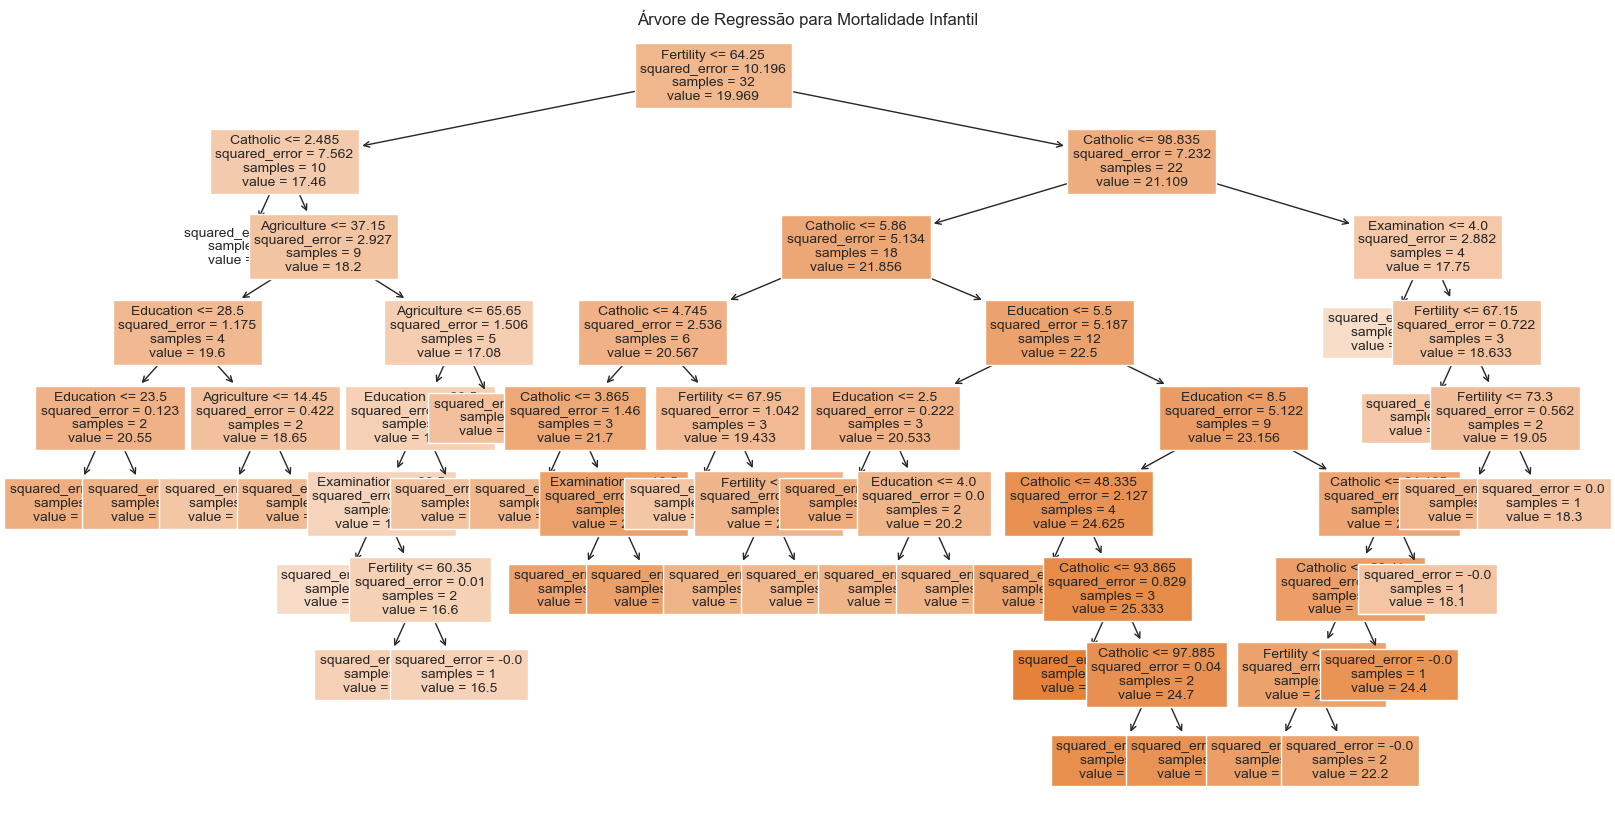

In [64]:
from sklearn.metrics import mean_absolute_error

# Criação e treinamento do modelo de árvore de regressão
regressor = DecisionTreeRegressor(random_state=123)
regressor.fit(X_train, y_train)

# Previsões no conjunto de teste
y_test_pred = regressor.predict(X_test)

# Cálculo do Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_test, y_test_pred)

# Visualização da árvore de regressão
plt.figure(figsize=(20,10))
plot_tree(regressor, feature_names=feature_names_list, filled=True, fontsize=10)
plt.title('Árvore de Regressão para Mortalidade Infantil')
plt.show()



In [65]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred = regressor.predict(X_train)     # predicted value of y_test
y_pred1 = regressor.predict(X_test)   # predicted value of y_train

MAE1 = mean_absolute_error(y_train,y_pred)
MAE2 = mean_absolute_error(y_test,y_pred1)

RMSE = np.sqrt(np.mean(y_test-y_pred1)**2)

print(round(MAE1,4))
print(round(MAE2,4))
print(round(RMSE,4))


0.0
1.92
0.9067
